## Network Security Data Preprocessing + Classification

### Intro
With the dramatic growth of computer networks usage and the huge increase in the number of applications running on top of it, network security is becoming increasingly while the all the systems suffers from security vulnerabilities, which could increase the attacks that could negatively affects the economy.<br><br>
Therefore detecting vulnerabilities in the system in the network has been more important and need to be done as accurate as possible in real time.

### Task 
A model will be created and trained using SVM classifier to distengush if there is an attack or not in the network packet.

### Instructions 
Intrusion Detection system will be created and designed using Support Vector Machine (SVM) algorithm:
- Being able to classify the if the packets is attack or normal
- Apply all the kernels that has been mentioned in the lecture ( Gassuian, RBF, Linear, polynomial) and compare the results
- Apply Grid-search VS Random techniques to select the parameters and compare the two results

 

----------
## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import GridSearchCV


# Turn off the warnings.
warnings.filterwarnings(action='ignore')
%matplotlib inline

------
## Reading Data

In [2]:
Trained_Data = pd.read_csv("Train.csv" , sep = "," , encoding = 'utf-8')
Tested_Data  = pd.read_csv("KELE.csv" , sep = "," , encoding = 'utf-8')

---------
## Exploring Data

In [3]:
Trained_Data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,count,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,tcp,ftp_data,SF,491,0,0,0,0,2,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,13,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,123,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,5,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,30,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,184,...,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune
125969,8,udp,private,SF,105,145,0,0,0,2,...,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125970,0,tcp,smtp,SF,2231,384,0,0,0,1,...,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125971,0,tcp,klogin,S0,0,0,0,0,0,144,...,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune


In [4]:
Tested_Data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,count,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,4,tcp,ssh,RSTO,3783,41588,0,0,0,0,...,0,0,0,0,0.00,0.00,0,0,0,0
1,0,udp,other,SF,81,0,0,0,0,0,...,0,0,0,0,0.00,0.00,0,0,0,0
2,0,udp,other,SF,336,590,0,0,0,0,...,0,1,0,0,0.00,1.00,0,0,0,0
3,3,udp,other,SF,868,0,0,0,0,0,...,0,2,0,0,0.00,1.00,0,0,0,0
4,0,udp,other,SF,250,0,0,0,0,0,...,0,3,0,0,0.00,1.00,0,0,0,0
5,3,udp,other,SF,868,0,0,0,0,0,...,1,4,1,0,0.00,0.75,0,0,0,0
6,22,udp,other,SF,168,0,0,0,0,0,...,1,5,1,0,0.17,0.80,0,0,0,0
7,0,udp,other,SF,336,590,0,0,0,0,...,1,6,1,0,0.14,0.83,0,0,0,0
8,3,udp,other,SF,868,0,0,0,0,0,...,2,7,1,0,0.00,0.71,0,0,0,0
9,3,udp,other,SF,868,0,0,0,0,1,...,3,8,1,0,0.00,0.62,0,0,0,0


---------
## Columns Modification

In [5]:
Trained_Data.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,count,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,tcp,ftp_data,SF,491,0,0,0,0,2,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,13,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,123,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,5,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,30,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
5,0,tcp,private,REJ,0,0,0,0,0,121,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune
6,0,tcp,private,S0,0,0,0,0,0,166,...,9,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
7,0,tcp,private,S0,0,0,0,0,0,117,...,15,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,neptune
8,0,tcp,remote_job,S0,0,0,0,0,0,270,...,23,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
9,0,tcp,private,S0,0,0,0,0,0,133,...,13,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune


In [6]:
Tested_Data.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,count,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,4,tcp,ssh,RSTO,3783,41588,0,0,0,0,...,0,0,0,0,0.00,0.00,0,0,0,0
1,0,udp,other,SF,81,0,0,0,0,0,...,0,0,0,0,0.00,0.00,0,0,0,0
2,0,udp,other,SF,336,590,0,0,0,0,...,0,1,0,0,0.00,1.00,0,0,0,0
3,3,udp,other,SF,868,0,0,0,0,0,...,0,2,0,0,0.00,1.00,0,0,0,0
4,0,udp,other,SF,250,0,0,0,0,0,...,0,3,0,0,0.00,1.00,0,0,0,0
5,3,udp,other,SF,868,0,0,0,0,0,...,1,4,1,0,0.00,0.75,0,0,0,0
6,22,udp,other,SF,168,0,0,0,0,0,...,1,5,1,0,0.17,0.80,0,0,0,0
7,0,udp,other,SF,336,590,0,0,0,0,...,1,6,1,0,0.14,0.83,0,0,0,0
8,3,udp,other,SF,868,0,0,0,0,0,...,2,7,1,0,0.00,0.71,0,0,0,0
9,3,udp,other,SF,868,0,0,0,0,1,...,3,8,1,0,0.00,0.62,0,0,0,0


-------
## Data Description

In [7]:
Trained_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 29 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   count                        125973 non-null  int64  
 10  srv_count                    125973 non-null  int64  
 11  serror_rate                  125973 non-null  float64
 12  srv_serror_rate              125973 non-null  float64
 13 

In [8]:
Tested_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     15 non-null     int64  
 1   protocol_type                15 non-null     object 
 2   service                      15 non-null     object 
 3   flag                         15 non-null     object 
 4   src_bytes                    15 non-null     int64  
 5   dst_bytes                    15 non-null     int64  
 6   land                         15 non-null     int64  
 7   wrong_fragment               15 non-null     int64  
 8   urgent                       15 non-null     int64  
 9   count                        15 non-null     int64  
 10  srv_count                    15 non-null     int64  
 11  serror_rate                  15 non-null     int64  
 12  srv_serror_rate              15 non-null     int64  
 13  rerror_rate           

In [9]:
Trained_Data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,count,srv_count,serror_rate,srv_serror_rate,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,84.107555,27.737888,0.284485,0.282485,...,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,114.508607,72.635840,0.446456,0.447022,...,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,...,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,14.000000,8.000000,0.000000,0.000000,...,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,143.000000,18.000000,1.000000,1.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,511.000000,511.000000,1.000000,1.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
Tested_Data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,count,srv_count,serror_rate,srv_serror_rate,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,15.00000,15.000000,15.000000,15.0,15.0,15.0,15.000000,15.000000,15.0,15.0,...,15.000000,15.000000,15.000000,15.0,15.000000,15.000000,15.0,15.0,15.0,15.0
mean,4.40000,712.266667,2890.533333,0.0,0.0,0.0,0.200000,0.933333,0.0,0.0,...,1.466667,6.266667,0.666667,0.0,0.109333,0.696667,0.0,0.0,0.0,0.0
std,7.30753,913.638602,10708.068719,0.0,0.0,0.0,0.414039,0.457738,0.0,0.0,...,1.552264,4.757951,0.487950,0.0,0.256918,0.321240,0.0,0.0,0.0,0.0
min,0.00000,18.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.00000,209.000000,0.000000,0.0,0.0,0.0,0.000000,1.000000,0.0,0.0,...,0.000000,2.500000,0.000000,0.0,0.000000,0.590000,0.0,0.0,0.0,0.0
50%,3.00000,336.000000,0.000000,0.0,0.0,0.0,0.000000,1.000000,0.0,0.0,...,1.000000,6.000000,1.000000,0.0,0.000000,0.800000,0.0,0.0,0.0,0.0
75%,3.00000,868.000000,295.000000,0.0,0.0,0.0,0.000000,1.000000,0.0,0.0,...,2.000000,9.500000,1.000000,0.0,0.145000,0.915000,0.0,0.0,0.0,0.0
max,22.00000,3783.000000,41588.000000,0.0,0.0,0.0,1.000000,2.000000,0.0,0.0,...,5.000000,16.000000,1.000000,0.0,1.000000,1.000000,0.0,0.0,0.0,0.0


In [11]:
Trained_Data.nunique()

duration                       2981
protocol_type                     3
service                          70
flag                             11
src_bytes                      3341
dst_bytes                      9326
land                              2
wrong_fragment                    3
urgent                            4
count                           512
srv_count                       509
serror_rate                      89
srv_serror_rate                  86
rerror_rate                      82
srv_rerror_rate                  62
same_srv_rate                   101
diff_srv_rate                    95
srv_diff_host_rate               60
dst_host_count                  256
dst_host_srv_count              256
dst_host_same_srv_rate          101
dst_host_diff_srv_rate          101
dst_host_same_src_port_rate     101
dst_host_srv_diff_host_rate      75
dst_host_serror_rate            101
dst_host_srv_serror_rate        100
dst_host_rerror_rate            101
dst_host_srv_rerror_rate    

In [12]:
Tested_Data.nunique()

duration                        4
protocol_type                   3
service                         3
flag                            2
src_bytes                       7
dst_bytes                       3
land                            1
wrong_fragment                  1
urgent                          1
count                           2
srv_count                       3
serror_rate                     1
srv_serror_rate                 1
rerror_rate                     1
srv_rerror_rate                 1
same_srv_rate                   2
diff_srv_rate                   1
srv_diff_host_rate              2
dst_host_count                  6
dst_host_srv_count             14
dst_host_same_srv_rate          2
dst_host_diff_srv_rate          1
dst_host_same_src_port_rate     6
dst_host_srv_diff_host_rate     9
dst_host_serror_rate            1
dst_host_srv_serror_rate        1
dst_host_rerror_rate            1
dst_host_srv_rerror_rate        1
dtype: int64

In [13]:
Trained_Data.max()

duration                             42908
protocol_type                          udp
service                              whois
flag                                    SH
src_bytes                       1379963888
dst_bytes                       1309937401
land                                     1
wrong_fragment                           3
urgent                                   3
count                                  511
srv_count                              511
serror_rate                              1
srv_serror_rate                          1
rerror_rate                              1
srv_rerror_rate                          1
same_srv_rate                            1
diff_srv_rate                            1
srv_diff_host_rate                       1
dst_host_count                         255
dst_host_srv_count                     255
dst_host_same_srv_rate                   1
dst_host_diff_srv_rate                   1
dst_host_same_src_port_rate              1
dst_host_sr

In [14]:
Tested_Data.max()

duration                          22
protocol_type                    udp
service                          ssh
flag                              SF
src_bytes                       3783
dst_bytes                      41588
land                               0
wrong_fragment                     0
urgent                             0
count                              1
srv_count                          2
serror_rate                        0
srv_serror_rate                    0
rerror_rate                        0
srv_rerror_rate                    0
same_srv_rate                      1
diff_srv_rate                      0
srv_diff_host_rate                 1
dst_host_count                     5
dst_host_srv_count                16
dst_host_same_srv_rate             1
dst_host_diff_srv_rate             0
dst_host_same_src_port_rate        1
dst_host_srv_diff_host_rate        1
dst_host_serror_rate               0
dst_host_srv_serror_rate           0
dst_host_rerror_rate               0
d

-----
### Exploring Responses

In [15]:
Results = set(Trained_Data['attack'].values)
print(Results,end=" ")

{'perl', 'portsweep', 'ftp_write', 'imap', 'neptune', 'land', 'warezclient', 'phf', 'pod', 'ipsweep', 'buffer_overflow', 'spy', 'satan', 'back', 'normal', 'loadmodule', 'warezmaster', 'smurf', 'multihop', 'teardrop', 'nmap', 'rootkit', 'guess_passwd'} 

## Classifying The Attack Results

In [16]:
Trained_attack = Trained_Data['attack'].map(lambda a: 0 if a == 'normal' else 1)
Trained_Data['attack_state'] = Trained_attack

In [17]:
Trained_Data.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,count,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,attack_state
0,0,tcp,ftp_data,SF,491,0,0,0,0,2,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,0
1,0,udp,other,SF,146,0,0,0,0,13,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,0
2,0,tcp,private,S0,0,0,0,0,0,123,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,1
3,0,tcp,http,SF,232,8153,0,0,0,5,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,0
4,0,tcp,http,SF,199,420,0,0,0,30,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,0
5,0,tcp,private,REJ,0,0,0,0,0,121,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,1
6,0,tcp,private,S0,0,0,0,0,0,166,...,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,1
7,0,tcp,private,S0,0,0,0,0,0,117,...,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,neptune,1
8,0,tcp,remote_job,S0,0,0,0,0,0,270,...,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,1
9,0,tcp,private,S0,0,0,0,0,0,133,...,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,1


In [18]:
Tested_Data.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,count,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,4,tcp,ssh,RSTO,3783,41588,0,0,0,0,...,0,0,0,0,0.00,0.00,0,0,0,0
1,0,udp,other,SF,81,0,0,0,0,0,...,0,0,0,0,0.00,0.00,0,0,0,0
2,0,udp,other,SF,336,590,0,0,0,0,...,0,1,0,0,0.00,1.00,0,0,0,0
3,3,udp,other,SF,868,0,0,0,0,0,...,0,2,0,0,0.00,1.00,0,0,0,0
4,0,udp,other,SF,250,0,0,0,0,0,...,0,3,0,0,0.00,1.00,0,0,0,0
5,3,udp,other,SF,868,0,0,0,0,0,...,1,4,1,0,0.00,0.75,0,0,0,0
6,22,udp,other,SF,168,0,0,0,0,0,...,1,5,1,0,0.17,0.80,0,0,0,0
7,0,udp,other,SF,336,590,0,0,0,0,...,1,6,1,0,0.14,0.83,0,0,0,0
8,3,udp,other,SF,868,0,0,0,0,0,...,2,7,1,0,0.00,0.71,0,0,0,0
9,3,udp,other,SF,868,0,0,0,0,1,...,3,8,1,0,0.00,0.62,0,0,0,0


--------
## Data preprocessing
### Checking for Missing Data

In [19]:
Trained_Data.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_count                 0
dst_host_srv_count             0
dst_host_same_srv_rate         0
dst_host_diff_srv_rate         0
dst_host_same_src_port_rate    0
dst_host_srv_diff_host_rate    0
dst_host_serror_rate           0
dst_host_srv_serror_rate       0
dst_host_rerror_rate           0
dst_host_srv_rerror_rate       0
attack                         0
attack_state                   0
dtype: int

In [20]:
Tested_Data.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_count                 0
dst_host_srv_count             0
dst_host_same_srv_rate         0
dst_host_diff_srv_rate         0
dst_host_same_src_port_rate    0
dst_host_srv_diff_host_rate    0
dst_host_serror_rate           0
dst_host_srv_serror_rate       0
dst_host_rerror_rate           0
dst_host_srv_rerror_rate       0
dtype: int64

-----
- **There is no missing data**

--------
### Checking for Duplicates

In [21]:
Trained_Data.duplicated().sum()

18

In [22]:
Tested_Data.duplicated().sum()

0

---------
- **There is no duplicated data**

-----
### Handling Outliers

In [23]:
Trained_Data.shape

(125973, 30)

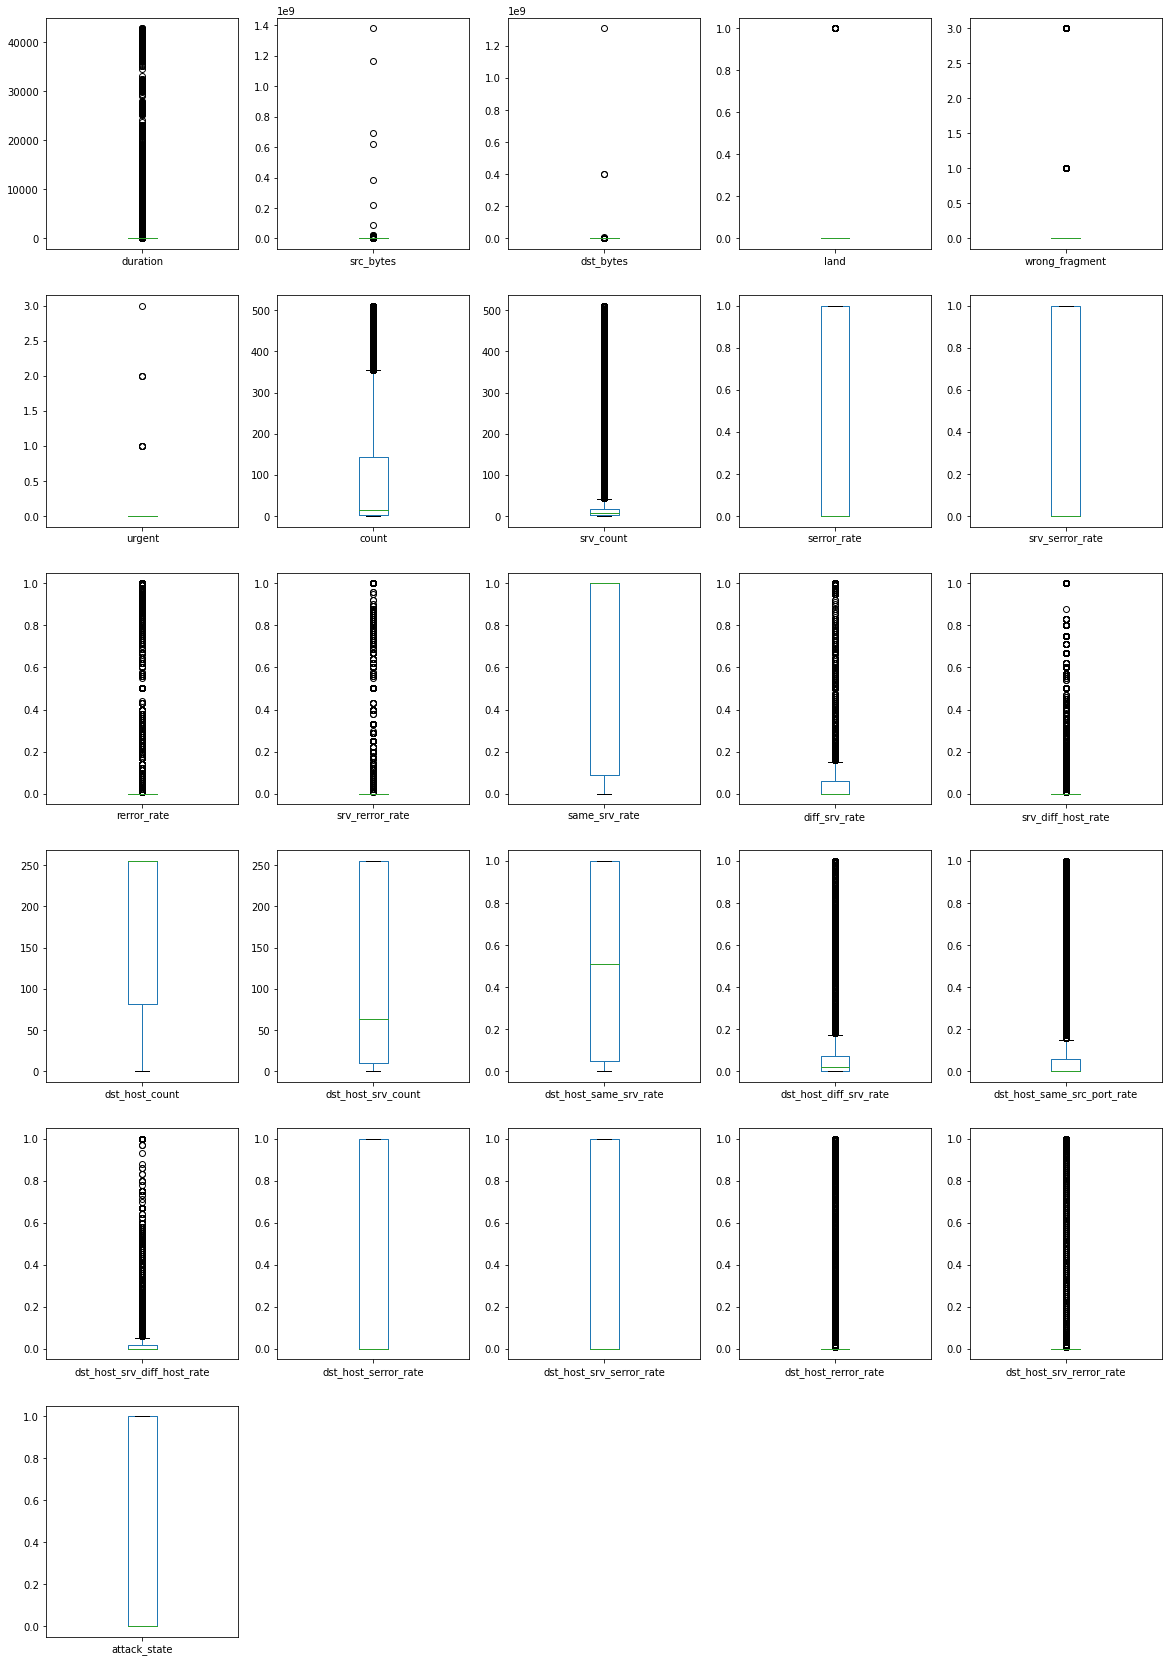

In [24]:
Trained_Data.plot(kind='box',subplots=1,layout=(8,5),figsize=(20,40))
plt.show()

In [25]:
Tested_Data.shape

(15, 28)

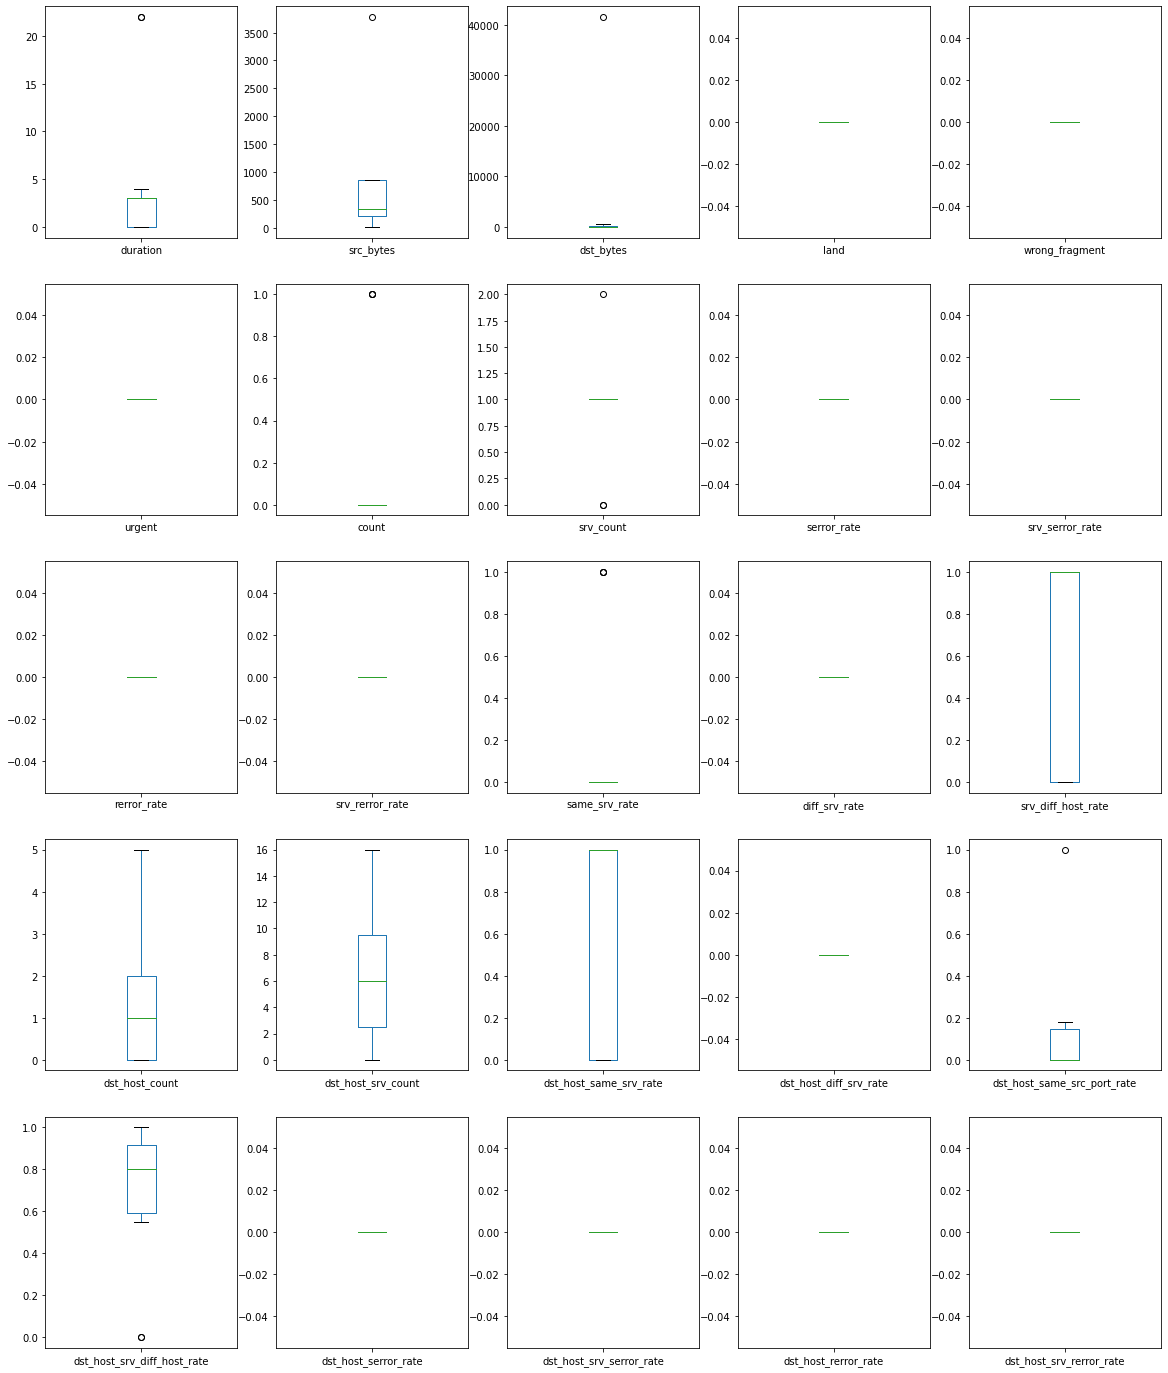

In [26]:
Tested_Data.plot(kind='box',subplots=1,layout=(8,5),figsize=(20,40))
plt.show()

-----
- **No significant outliers in the data**

-------------
## Data Encoding

In [32]:
serv_LE= LabelEncoder()
proto_LE= LabelEncoder()
flag_LE= LabelEncoder()


Trained_Data['protocol_type'] = proto_LE.fit_transform(Trained_Data[['protocol_type']])
Tested_Data['protocol_type'] = proto_LE.transform(Tested_Data[['protocol_type']])


Trained_Data['service'] = serv_LE.fit_transform(Trained_Data[['service']])
Tested_Data['service'] = serv_LE.transform(Tested_Data[['service']])

Trained_Data['flag'] = flag_LE.fit_transform(Trained_Data[['flag']])
Tested_Data['flag'] = flag_LE.transform(Tested_Data[['flag']])


----
## Data Splitting 

In [41]:
X_train = Trained_Data.drop('attack', axis = 1)

X_train = Trained_Data.drop(['attack', 'attack_state'], axis = 1)
X_test = Tested_Data


Y_train = Trained_Data['attack_state']




In [44]:
X_test.shape


(15, 28)

In [36]:
X_test.shape

(15, 28)

---------
## Data Scaling

In [45]:
Ro_scaler = RobustScaler()
X_train = Ro_scaler.fit_transform(X_train) 

X_test= Ro_scaler.transform(X_test)

In [46]:
X_train.shape, Y_train.shape

((125973, 28), (125973,))

------
## Working on Trained Data
### VIF 

In [47]:
A = sm.add_constant(X_train)
Est1 = sm.GLM(Y_train, A)
Est2 = Est1.fit()
Est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           attack_state   No. Observations:               125973
Model:                            GLM   Df Residuals:                   125944
Model Family:                Gaussian   Df Model:                           28
Link Function:               identity   Scale:                        0.041132
Method:                          IRLS   Log-Likelihood:                 22254.
Date:                Fri, 25 Nov 2022   Deviance:                       5180.4
Time:                        13:51:40   Pearson chi2:                 5.18e+03
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1546      0.002     80.583      0.000       0.151       0.158
x1         -1.621e-06   2.53e-07     -6.409      0.000   -2.12e-06   -1.13e-06
x2            -0.2223      0.002   -138.705      0.000      -0.225      -0.219
x3            -0.0130      0.001    -10.865      0.000      -0.015      -0.011
x4             0.1551      0.005     32.254      0.000       0.146       0.165
x5          1.647e-07    2.7e-08      6.106      0.000    1.12e-07    2.18e-07
x6          3.964e-08   7.34e-08      0.540      0.589   -1.04e-07    1.83e-07
x7            -0.3576      0.041     -8.747      0.000      -0.438      -0.277
x8             0.3167      0.002    132.396      0.000       0.312       0.321
x9             0.0363      0.040      0.913      0.361      -0.042       0.114
x10           -0.0129      0.002     -8.296      0.000      -0.016      -0.010
x11            0.0178      0.000     78.536      0.000       0.017       0.018
x12           -0.1306      0.013     -9.862      0.000      -0.157      -0.105
x13            0.4506      0.014     31.405      0.000       0.423       0.479
x14           -0.0652      0.014     -4.552      0.000      -0.093      -0.037
x15            0.5469      0.015     35.622      0.000       0.517       0.577
x16           -0.4689      0.004   -117.955      0.000      -0.477      -0.461
x17           -0.0135      0.000    -48.714      0.000      -0.014      -0.013
x18            0.0663      0.003     26.070      0.000       0.061       0.071
x19            0.1047      0.001     71.065      0.000       0.102       0.108
x20           -0.2744      0.004    -76.839      0.000      -0.281      -0.267
x21            0.1918      0.004     46.646      0.000       0.184       0.200
x22            0.0160      0.000     44.455      0.000       0.015       0.017
x23            0.0165      0.000    106.938      0.000       0.016       0.017
x24            0.0078      0.000     58.866      0.000       0.008       0.008
x25            0.1147      0.008     13.583      0.000       0.098       0.131
x26            0.1638      0.010     16.194      0.000       0.144       0.184
x27            0.0414      0.006      7.040      0.000       0.030       0.053
x28            0.1340      0.008     16.684      0.000       0.118       0.150
==============================================================================
"""

--------
### Data Modeling

#### Evaluating Function

In [48]:
def Evaluate(Model_Name, Model_Abb, X_test, Y_test):
    
    Pred_Value= Model_Abb.predict(X_test)
    Accuracy = metrics.accuracy_score(Y_test,Pred_Value)                      
    Sensitivity = metrics.recall_score(Y_test,Pred_Value)
    Precision = metrics.precision_score(Y_test,Pred_Value)
    F1_score = metrics.f1_score(Y_test,Pred_Value)
    Recall = metrics.recall_score(Y_test,Pred_Value)
    
    print('--------------------------------------------------\n')
    print('The {} Model Accuracy   = {}\n'.format(Model_Name, np.round(Accuracy,3)))
    print('The {} Model Sensitvity = {}\n'.format(Model_Name, np.round(Sensitivity,3)))
    print('The {} Model Precision  = {}\n'.format(Model_Name, np.round(Precision,3)))
    print('The {} Model F1 Score   = {}\n'.format(Model_Name, np.round(F1_score,3)))
    print('The {} Model Recall     = {}\n'.format(Model_Name, np.round(Recall,3)))
    print('--------------------------------------------------\n')
    
    Confusion_Matrix = metrics.confusion_matrix(Y_test, Pred_Value)
    plot_confusion_matrix(Confusion_Matrix,class_names=['Normal', 'Attack'],figsize=(5.55,5), colorbar= "blue")
    plot_roc_curve(Model_Abb, X_test, Y_test)

#### Grid Search Function

In [49]:
def GridSearch(Model_Abb, Parameters, X_train, Y_train):
    Grid = GridSearchCV(estimator=Model_Abb, param_grid= Parameters, cv = 3, n_jobs=-1)
    Grid_Result = Grid.fit(X_train, Y_train)
    Model_Name = Grid_Result.best_estimator_
    
    return (Model_Name)

#### Logistic Regression

In [50]:
LR= LogisticRegression()
LR.fit(X_train , Y_train)

LogisticRegression()

In [52]:
LR.score(X_train, Y_train)

0.8360997991633128

#### Decision Tree Classifier

In [53]:
DT =DecisionTreeClassifier(max_features=6, max_depth=4)
DT.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=4, max_features=6)

In [55]:
DT.score(X_train, Y_train)

0.940638073237916

[Text(418.5, 587.0880000000001, 'X[15] <= -0.555\ngini = 0.498\nsamples = 125973\nvalue = [67343, 58630]'),
 Text(209.25, 456.624, 'X[3] <= -0.875\ngini = 0.075\nsamples = 45520\nvalue = [1780, 43740]'),
 Text(104.625, 326.1600000000001, 'X[4] <= 0.047\ngini = 0.001\nsamples = 42761\nvalue = [29, 42732]'),
 Text(52.3125, 195.69600000000003, 'X[19] <= 0.214\ngini = 0.001\nsamples = 42748\nvalue = [18, 42730]'),
 Text(26.15625, 65.23200000000008, 'gini = 0.0\nsamples = 42736\nvalue = [9, 42727]'),
 Text(78.46875, 65.23200000000008, 'gini = 0.375\nsamples = 12\nvalue = [9, 3]'),
 Text(156.9375, 195.69600000000003, 'X[11] <= 0.395\ngini = 0.26\nsamples = 13\nvalue = [11, 2]'),
 Text(130.78125, 65.23200000000008, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(183.09375, 65.23200000000008, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(313.875, 326.1600000000001, 'X[9] <= -0.025\ngini = 0.464\nsamples = 2759\nvalue = [1751, 1008]'),
 Text(261.5625, 195.69600000000003, 'X[24] <= 0.015

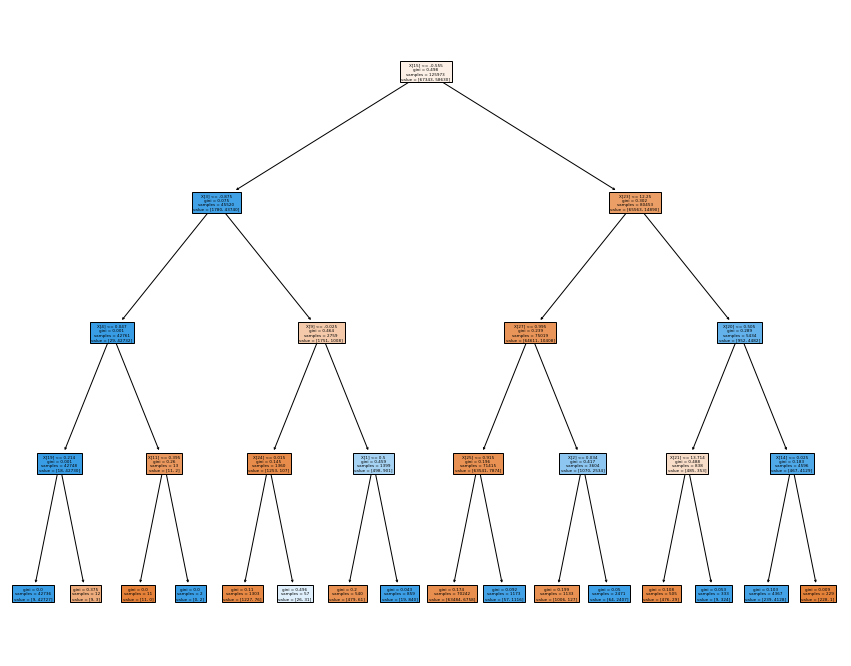

In [56]:
fig = plt.figure(figsize=(15,12))
tree.plot_tree(DT, filled=True)

#### Random Forest Classifier

In [57]:
max_depth= [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
    
Parameters={ 'max_depth': max_depth}

In [59]:
RF= RandomForestClassifier()
GridSearch(RF, Parameters, X_train, Y_train)

RandomForestClassifier(max_depth=11)

In [60]:
RF.fit(X_train, Y_train)

RandomForestClassifier()

In [61]:
RF.score(X_train, Y_train)

0.999944432537131

In [64]:
RF.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

#### KNN-Model

In [62]:
KNN= KNeighborsClassifier(n_neighbors=6) 
KNN.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=6)

In [63]:
KNN.score(X_train, Y_train)

0.9939828375921824